In [1]:
#ini-iPython
import os
os.chdir("/home/vinicius/Dropbox/Projeto Mestrado/Codigos/RoboFEI-HT_Debug/AI/Visual_Memory") #Executando na pasta Vision
import sys
sys.path.append("./include")
sys.path.append("./src")
sys.path.append("./iPython")
#end-iPython

---- Imports ----

In [2]:
# Libraries to be used.
import sys
#des-iPython sys.path.append("../include")
#des-iPython sys.path.append("../src")

In [3]:
# The standard libraries used in the visual memory system.


In [4]:
# Used class developed by RoboFEI-HT.
from BasicThread import * # Class responsible for implementing thread
sym.init_printing() #debug-iPython

# Class to Landmark
.
doxygen-iPython

In [5]:
#des-iPython class Landmark(BasicThread):
#ini-tab -> Iniciando código classe

---- Variables ----

# __t
.
doxygen-iPython

In [6]:
__t = None #self-iPython __t

# __movlastmeasurement
Saves the moviment at the last measurement time.
doxygen-iPython

__movlastmeasurement = 0 #self-iPython __movlastmeasurement

# __A
Declaring matrix A of the Kalman Filter.
doxygen-iPython

In [7]:
__A = None #self-iPython __A

# __B
Declaring matrix B of the Kalman Filter.
doxygen-iPython

In [8]:
__B = None #self-iPython __B

# __R
Declaring matrix R of the Kalman Filter.
doxygen-iPython

In [9]:
__R = None #self-iPython __R

# __C
Declaring matrix C of the Kalman Filter.
doxygen-iPython

In [10]:
__C = None #self-iPython __C

# __Q
Declaring matrix Q of the Kalman Filter.
doxygen-iPython

In [11]:
__Q = None #self-iPython __Q

In [12]:
#ini-iPython

# ------- Lista de funções herdadas -------



# ------- Lista variaveis herdadas -------

_obsstate = {} #self-iPython _obsstate
_predictedstate = {} #self-iPython _predictedstate
_state = {} #self-iPython _state

class test:
    def error(self, a):
        return 0.1

_speeds = test() #self-iPython _speeds

# ------- Lista de funções -------

#self-iPython reset
#self-iPython prediction
#self-iPython update

#end-iPython - Fim listas

# reset
doxygen-iPython

In [22]:
#eself-iPython reset
#edes-iPython def reset(self):
def reset( ):
    global __t, _state, _predictedstate #debug-iPython
    global __A, __B, __R, __C, __Q #debug-iPython
    __t = sym.symbols("t") # Declaring variable time

    # Creating the Kalman Filter Matrix
    __A = sym.Matrix([
            [1, 0, __t, 0, 0.5*__t**2, 0],
            [0, 1, 0, __t, 0, 0.5*__t**2],
            [0, 0, 1, 0, __t, 0],
            [0, 0, 0, 1, 0, __t],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1],
        ])

    p_x, p_y = sym.symbols("p_x, p_y")
    v_x, v_y = sym.symbols("v_x, v_y")
    a_x, a_y = sym.symbols("a_x, a_y")
    __B = sym.Matrix([
            [-__t, 0, p_x, p_y],
            [0, -__t, p_y, -p_x],
            [0, 0, v_x, v_y],
            [0, 0, v_y, -v_x],
            [0, 0, a_x, a_y],
            [0, 0, a_y, -a_x],
        ])

    __R = sym.Matrix(sym.Identity(6)*parameters["motion_error"])

    __C = sym.Matrix([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
        ])

    __Q = sym.Matrix(sym.Identity(2)*parameters["vision_error"])


    # Initial state
    _predictedstate["x"] = sym.Matrix([0, 0, 0, 0, 0, 0])
    _predictedstate["covariance"] = sym.Matrix(sym.Identity(6)*1000)
    _predictedstate["time"] = -1

    _state = copy(_predictedstate)
    
    
    # To landmark
    __A = sym.Matrix([
            [1, 0, __t, 0, 0.5*__t**2, 0],
            [0, 1, 0, __t, 0, 0.5*__t**2],
            [0, 0, 1, 0, __t, 0],
            [0, 0, 0, 1, 0, __t],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, -1, 0],
        ]) #self-iPython reset

In [23]:
#ini-iPython

## Teste reset

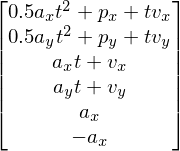

In [24]:
parameters = {}
parameters["motion_error"] = 1
parameters["vision_error"] = 1
reset( )
del parameters

p_x, p_y = sym.symbols("p_x, p_y")
v_x, v_y = sym.symbols("v_x, v_y")
a_x, a_y = sym.symbols("a_x, a_y")

_state["x"], _state["covariance"], __A, __B, __R, __C, __Q
__A*sym.Matrix([
        [p_x],
        [p_y],
        [v_x],
        [v_y],
        [a_x],
        [a_y],
    ])
#end-iPython

# Constructor Class
doxygen-iPython

In [16]:
#des-iPython def __init__(self, s):
s = None #debug-iPython
#ini-tab -> Criando construtor
#des-iPython super(Landmark, self).__init__(s)

# Default values
parameters = {
    "vision_error": 1,
    "motion_error": 2,
}

# Reading "config.ini" values
conf = ConfigIni("Landmark", "Settings")
parameters = conf.read(parameters)

reset()

In [17]:
#end-tab -> Finalizando construtor
#ini-iPython

## Teste construtor

In [18]:
for key in parameters.keys():
    print key + ":", parameters[key]
#end-iPython

motion_error: 2
vision_error: 1


# prediction
doxygen-iPython

In [19]:
#eself-iPython prediction
#edes-iPython def prediction(self, __tnow = None):
def prediction(__tnow = None):
    

In [20]:
#ini-iPython

## Teste prediction

In [21]:
prediction()
_predictedstate["x"], _predictedstate["covariance"]
#end-iPython

AttributeError: 'module' object has no attribute '__transpose'

# update
doxygen-iPython

In [ ]:
#eself-iPython update
#edes-iPython def update(self, observation):
def update(observation):
    global _predictedstate #debug-iPython
    prediction(observation[3]) # Send time to predition
    
       
    k = _predictedstate['covariance'] * sym.transpose(__C) * sym.inv_quick( # covariance*C.T*(__)^(-1)
        __C * _predictedstate['covariance'] * sym.transpose(__C) + __Q # C*covariance*C.T + Q
    )
    
    z = sym.Matrix(observation[1:3])
    
    _state['x'] = _predictedstate['x'] + k*(z - __C*_predictedstate['x'])
    _state['covariance'] = (sym.Matrix(sym.Identity(6)) - k*__C) * _predictedstate['covariance']
    
    _predictedstate = _state #self-iPython update

In [ ]:
#ini-iPython

## Teste update

In [ ]:
obs = [
    1, # qual é o land
    5, # posição x
    3, # posição y
    23, # tempo
]
update(obs)

_state['x'].evalf(), _state['covariance'].evalf()#, _state['time']
# _state['covariance'].evalf()

#end-iPython

In [ ]:
#end-tab -> Finalizando classe

In [ ]:
#ini-iPython

# nova_variavel
.
doxygen-iPython

In [ ]:
nova_variavel = None #self-iPython nova_variavel

# nova_funcao
doxygen-iPython

In [ ]:
# eself-iPython nova_funcao
# edes-iPython def nova_funcao(self, variaveis_funcao):
def nova_funcao(variaveis_funcao):
    pass # self-iPython nova_funcao

In [ ]:
#ini-iPython

## Teste nova_funcao

In [ ]:

#end-iPython

In [ ]:
#end-iPython